In [5]:
import os
import cv2
import numpy as np
import random
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

In [144]:
logo_path = "grab-logo-2.png"

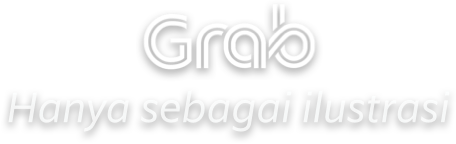

In [145]:
Image.open(logo_path)

In [146]:
img = PIL.Image.open(logo_path)
logo_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)#cv2.imread(self.logo_path)
logo_img = cv2.cvtColor(logo_img, cv2.COLOR_BGR2RGB)

In [147]:
x = PIL.Image.fromarray(logo_img, 'RGB')

In [148]:
orig_width = 920

In [149]:
# scale picture (with logo) to WIDTH size
height, width, _ = logo_img.shape
scale1 = random.uniform(0.9, 1.1)
scale2 = random.uniform(0.9, 1.1)
WIDTH = 360
height = int(float(WIDTH)/orig_width * height * scale1)
width = int(float(WIDTH)/orig_width * width * scale2)

logo_img_resized = cv2.resize(logo_img, (width, height), interpolation=cv2.INTER_LINEAR)


In [150]:
x = PIL.Image.fromarray(logo_img_resized, 'RGB')

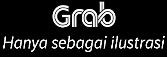

In [151]:
x

In [152]:
logo_img_resized.shape

(57, 167, 3)

In [153]:
# Adding watermark to image
x = PIL.Image.open("zebra.jpg")
x = np.array(x)


In [154]:
x.shape

(386, 640, 3)

In [155]:
# Image resize
orig_height, orig_width, _ = x.shape
height = int(float(WIDTH)/orig_width * orig_height)
x = cv2.resize(x, (WIDTH, height), interpolation=cv2.INTER_LINEAR)

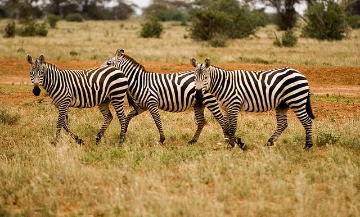

In [156]:
PIL.Image.fromarray(x)

In [157]:
x.shape

(217, 360, 3)

In [158]:
# embed watermark at random positions with some border
m, n, _ = logo_img_resized.shape
h, w, _ = x.shape

assert h >= m and w >= n
hb = (h-m) // 10
wb = (w-n) // 10
p = random.randint(hb, h-m-hb)
q = random.randint(wb, w-n-wb)

x = x.astype(np.float32)
scale = random.uniform(0.15, 0.2)      #cleaned_1_5_artificial_watermark_015_02

In [159]:
target_size = random.randint(256, 512)
target_size

276

In [160]:
scale

0.18831514637624058

In [161]:
x[p:p+m, q:q+n, :] = x[p:p+m, q:q+n, :] + scale*logo_img_resized
x = np.clip(x, 0, 255).astype(np.uint8)

# resize to target size
x = cv2.resize(x, (target_size, target_size), interpolation=cv2.INTER_LINEAR)

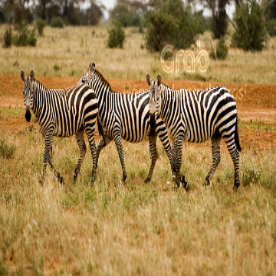

In [162]:
PIL.Image.fromarray(x)

In [163]:
logo_img_scaled = logo_img_resized * 0.15
logo_img_scaled = np.clip(logo_img_scaled, 0, 255).astype(np.uint8)

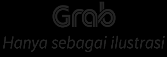

In [164]:
PIL.Image.fromarray(logo_img_scaled)